O beta da ação em relação ao Ibovespa é: 0.85
O coeficienteem determinação (R2) é: 0.25


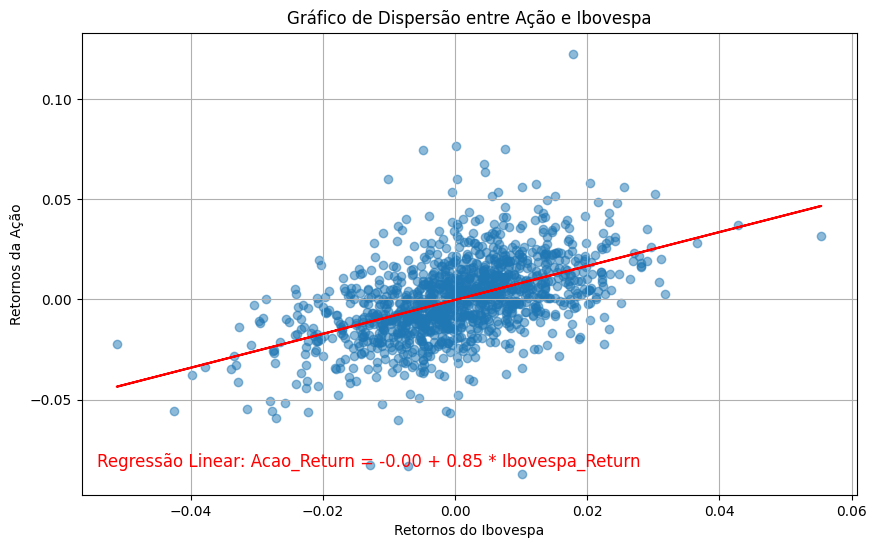

In [3]:
import yfinance as yf
import pandas as pd
from scipy import stats
import numpy as np #importar numpy para linha de tendência
import matplotlib.pyplot as plt

#simbolo da ação no Ibovespa
acao_brasileira = 'hype3.SA'
ibovespa = '^BVSP'

#Dados históricos da ação e do ibovespa
acao_data = yf.Ticker(acao_brasileira).history(period='5y')
ibovespa_data =- yf.Ticker(ibovespa).history(period='5y')

#Extrair preços de fechamento
acao_close = acao_data['Close']
ibovespa_close = ibovespa_data['Close']

#dataframe com os preços de fechamento das duas séries
df = pd.DataFrame({'Acao': acao_close, 'Ibovespa':ibovespa_close})

#calculo de retorno diário
df['Acao_Return'] = df['Acao'].pct_change()
df['Ibovespa_Return'] = df['Ibovespa'].pct_change()

#Remover os nan resultantes do retorno
df = df.dropna()

#Calculo do coeficiente de determinação (R2)
slope, intercept, r_value, p_value, std_err = stats.linregress(df['Ibovespa_Return'], df['Acao_Return'])
r_squared = r_value**2

#Calculo do Beta
covariance = df['Acao_Return'].cov(df['Ibovespa_Return'])
variance = df['Ibovespa_Return'].var()
beta = covariance / variance

print(f'O beta da ação em relação ao Ibovespa é: {beta:.2f}')
print(f'O coeficienteem determinação (R2) é: {r_squared:.2f}')

#Grafico de dispersão com reta de tendência
plt.figure(figsize=(10,6))
plt.scatter(df['Ibovespa_Return'], df['Acao_Return'], alpha=0.5)
plt.title('Gráfico de Dispersão entre Ação e Ibovespa')
plt.xlabel('Retornos do Ibovespa')
plt.ylabel('Retornos da Ação')

#Reta de tendência
plt.plot(df['Ibovespa_Return'], intercept + slope * df['Ibovespa_Return'], color='red')

#Fórmula da reta no gráfico
equation = f'Regressão Linear: Acao_Return = {intercept:.2f} + {slope:.2f} * Ibovespa_Return'
plt.text(0.02, 0.06, equation, fontsize=12, color='red', transform=plt.gca().transAxes)

plt.grid(True)
plt.show()